In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from .tsv file, had to ignore an error, imported as str for ease and will alter later

ks_data = pd.read_csv('38050-0001-Data.tsv', sep='\t', dtype=str, encoding_errors='ignore')


# My Functions

In [3]:
#get portion of data
def df_head(dataframe):
    if not dataframe.head().empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe):
    if not dataframe.empty:
        return dataframe.describe()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = (num_nulls / len(dataframe) * 100).round(2)
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            print(f"Here are the number of nulls per column: \n{num_nulls}")
            print(f"Here are the percent of nulls per column: \n{percent_nulls}")
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dups = check_dups(dataframe)
    if dups == 0:
        return dataframe
    else:
        return dataframe.drop_duplicates()


#Visuals 

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make boxplots
def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe):
    correlation = dataframe.corr
    return sns.heatmap(correlation)

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# EDA

In [4]:
#make copy of raw data
ks_copy = ks_data.copy()

In [5]:
#first thing I want to do is check for duplicates
check_dups(ks_copy)

'There are 0 duplicates in your dataframe'

In [5]:
#I will remove some columns like Name amd URL as the data is masked and some ID columns as the data is redundant

ks_copy = ks_copy.drop(['CASEID','NAME', 'PID', 'CATEGORY_ID', 'SUBCATEGORY_ID', 'UID', 'URL_NAME'], axis=1)

In [6]:
#let's format and rename the columns so it doesnt look like we are yelling

ks_copy.columns = ks_copy.columns.str.capitalize()

# Some of the column names are too long
new_features = {'Caseid': 'Case_ID', 'Project_page_location_name': 'Project_Country',
                 'Project_page_location_state': 'Project_State', 'Project_page_location_county': 'City',
                 'Launched_date': 'Launched', 'Deadline_date': 'Deadline',
                 'Project_currency': 'Project_Currency', 'Goal_in_original_currency': 'Goal',
                 'Pledged_in_original_currency': 'Pledged', 'Goal_in_usd': 'Goal (USD)',
                 'Pledged_in_usd': 'Pledged (USD)', 'Backers_count': 'Backers (#)',
                 'State': 'Status'}


In [7]:
ks_copy.rename(columns=new_features, inplace=True)

In [8]:
# format the numerical columns - Goal, Pledged, Goal (USD), Pledged (USD), Backers (#)

numeric_columns = ['Goal', 'Pledged', 'Goal (USD)', 'Pledged (USD)', 'Backers (#)']


#need to change these functions
def replace_characters(dataframe, columns, characters, replacement, regex):
    for column in columns:
        dataframe[column].replace(characters, replacement, regex=regex, inplace=True)
    return df_head(dataframe)


#change data types
def change_data_type(dataframe, columns, new_type):
   for column in columns:
       dataframe[column] = dataframe[column].astype(new_type)
   return df_info(dataframe)


In [9]:
replace_characters(ks_copy, numeric_columns, '\$|,|\\s', '', True)

,Category,Subcategory,Project_Country,Project_State,City,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,Film & Video,Science Fiction,London,England,Greater London,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,Film & Video,Fantasy,Los Angeles,CA,Los Angeles,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,Technology,Software,Mexico,Baja California,Tijuana,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,Publishing,Publishing,Columbus,OH,Franklin,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,Art,Illustration,Toronto,ON,Toronto,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed


In [10]:
#columns where values are spaces...Checked individually prior to

# ks_copy[(ks_copy['Project_Country'] == ' ') | (ks_copy['Project_State'] == ' ') | (ks_copy['City'] == ' ')]

space_columns = ['Project_Country', 'Project_State', 'City']

replace_characters(ks_copy, space_columns, ' ', np.nan, False)

#Figure out how to replace ' ' only not words with spaces... might have to go column by column

,Category,Subcategory,Project_Country,Project_State,City,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,Film & Video,Science Fiction,London,England,Greater London,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,Film & Video,Fantasy,Los Angeles,CA,Los Angeles,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,Technology,Software,Mexico,Baja California,Tijuana,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,Publishing,Publishing,Columbus,OH,Franklin,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,Art,Illustration,Toronto,ON,Toronto,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed


In [11]:
# Backers has some empty strings - replace with 0

replace_characters(ks_copy, ['Backers (#)'], '', np.nan, False)

,Category,Subcategory,Project_Country,Project_State,City,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,Film & Video,Science Fiction,London,England,Greater London,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,Film & Video,Fantasy,Los Angeles,CA,Los Angeles,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,Technology,Software,Mexico,Baja California,Tijuana,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,Publishing,Publishing,Columbus,OH,Franklin,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,Art,Illustration,Toronto,ON,Toronto,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed


In [15]:
check_nulls(ks_copy)

Here are the number of nulls per column: 
Category                0
Subcategory             0
Project_Country      1873
Project_State        2014
City                64082
Launched                0
Deadline                0
Project_Currency        0
Goal                    0
Pledged                 0
Goal (USD)              0
Pledged (USD)           0
Backers (#)         10148
Status                  0
dtype: int64
Here are the percent of nulls per column: 
Category             0.00
Subcategory          0.00
Project_Country      0.37
Project_State        0.40
City                12.66
Launched             0.00
Deadline             0.00
Project_Currency     0.00
Goal                 0.00
Pledged              0.00
Goal (USD)           0.00
Pledged (USD)        0.00
Backers (#)          2.00
Status               0.00
dtype: float64


Nulls are present in Country, State, City, Backers. City has a null frequency of 12.66, but the others are 2% and lower. Will decide how to proceed later.

In [12]:
#change Status values to title

ks_copy['Status'] = ks_copy['Status'].str.title()

In [15]:
#see unique values per feature
unique(ks_copy)
#There are not over 21k countries...

('Here are the number of unique values per columns:',
 Case_ID             506199
 Category                15
 Subcategory            161
 Project_Country      21201
 Project_State         1550
 City                  5412
 Launched              4256
 Deadline              4208
 Project_Currency        15
 Goal                 10725
 Pledged              52112
 Goal (USD)           41992
 Pledged (USD)        49686
 Backers (#)           1001
 Status                   4
 dtype: int64)

Will do a breakdown of Category, Status and Country.

There are apparantlt over 21k unique values for countries when this is False. The Project_State and city are also a complete mess and will take too much time to clean. So, I will drop them. I will also drop the Goal and Pledged for USD as they are redundant.

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. *For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.*"

So, I will use the currency codes to replace the Project_country, and drop the State, and city.

EUR will become Europe as some places in Europe have a choice

In [13]:
#make dictionary using project currency except EUR - will use cities for EUR

currency_codes = {'USD': 'United States of America', 'EUR': 'Europe', 'GBP': 'United Kingdom', 'CAD': 'Canada', 
                  'AUD': 'Australia', 'MXN': 'Mexico', 'SEK': 'Sweden', 'HKD': 'Hong Kong',
                  'NZD': 'New Zealand', 'DKK': 'Denmark', 'SGD': 'Singapore', 'CHF': 'Switzerland',
                  'NOK': 'Norway', 'JPY': 'Japan', 'PLN': 'Poland'}

In [91]:
#make new df to make further manipulations

working_copy = ks_copy.copy()

In [92]:
#replace Project_Country values with currency code dictionary

working_copy['Project_Country'] = working_copy['Project_Currency'].map(currency_codes)

In [93]:
#Drop project_state, city, Goal and pledged (USD)
working_copy.drop(['Project_State', 'City', 'Goal (USD)', 'Pledged (USD)'], axis=1, inplace=True)

In [94]:
#change Launched and Deadline to datetime

working_copy['Launched'] = pd.to_datetime(working_copy['Launched'])
working_copy['Deadline'] = pd.to_datetime(working_copy['Deadline'])

In [95]:
#calculate the duration in days
working_copy['Duration (days)'] = (working_copy['Deadline'] - working_copy['Launched']).dt.days

In [96]:
#some more data cleaning

#fill nan with 0 in Backers (#)
working_copy['Backers (#)'].fillna(0, inplace=True)

#change data type of Goal, Pledged, Backers (#) to int
change_data_type(working_copy, ['Goal', 'Pledged', 'Backers (#)'], int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Category          506199 non-null  object        
 1   Subcategory       506199 non-null  object        
 2   Project_Country   506199 non-null  object        
 3   Launched          506199 non-null  datetime64[ns]
 4   Deadline          506199 non-null  datetime64[ns]
 5   Project_Currency  506199 non-null  object        
 6   Goal              506199 non-null  int64         
 7   Pledged           506199 non-null  int64         
 8   Backers (#)       506199 non-null  int64         
 9   Status            506199 non-null  object        
 10  Duration (days)   506199 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 42.5+ MB


Need to start do EDA - explore categories, countries, status

Counts - Category, Project_Country, Status, years?
Histograms - Goal, Pledged, Backers, Duration
Boxplots - Goal, Pledged, Backers, Duration
pairplot
heatmap - will need to get dummies for data

In [21]:
#make bar graphs for count data
def get_counts(dataframe, column):
    new_df = pd.DataFrame(dataframe[column].value_counts())
    new_df.reset_index(inplace=True)
    new_df.rename(columns={'index': column, column: 'Count'}, inplace=True)
    return new_df

# function to graph counts
def graph_counts(dataframe, x_column, y_column, figsize=tuple):
    plt.figure(figsize=figsize)
    plt.bar(dataframe[x_column], dataframe[y_column])
    plt.xticks(rotation=45)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} {y_column}")
    plt.show()

In [63]:
#count of campaigns by category, country, and status
category_counts = get_counts(working_copy, 'Category')
country_count = get_counts(working_copy, 'Project_Country')
status_count = get_counts(working_copy, 'Status')

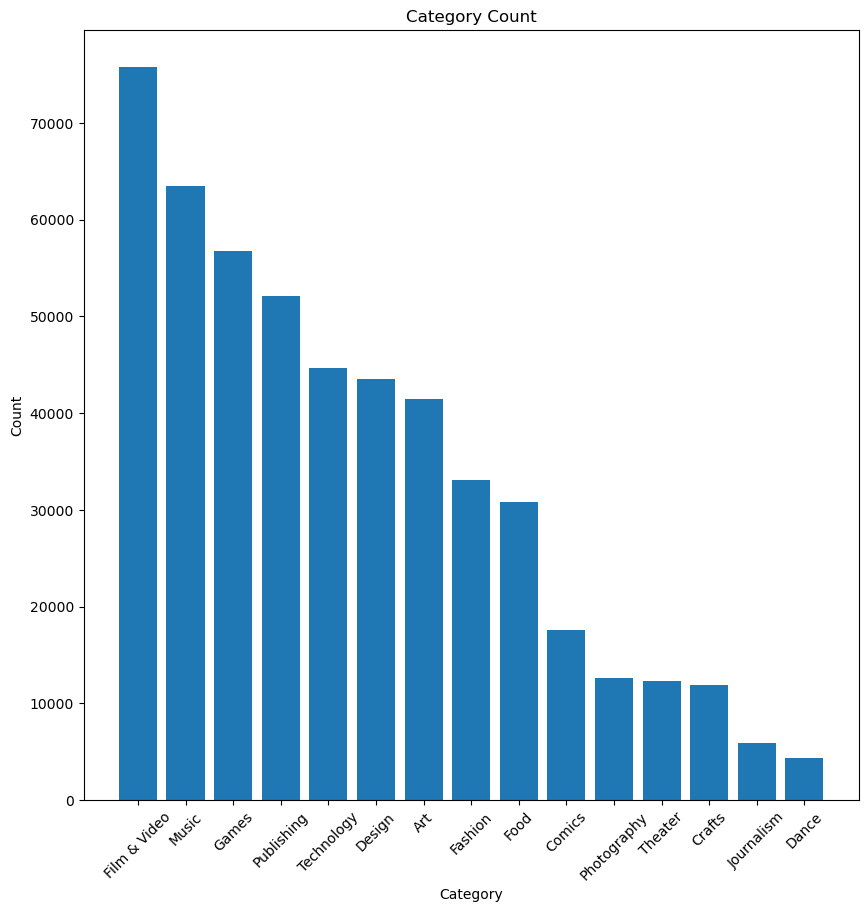

In [66]:
graph_counts(category_counts, 'Category', 'Count', figsize=(10, 10))

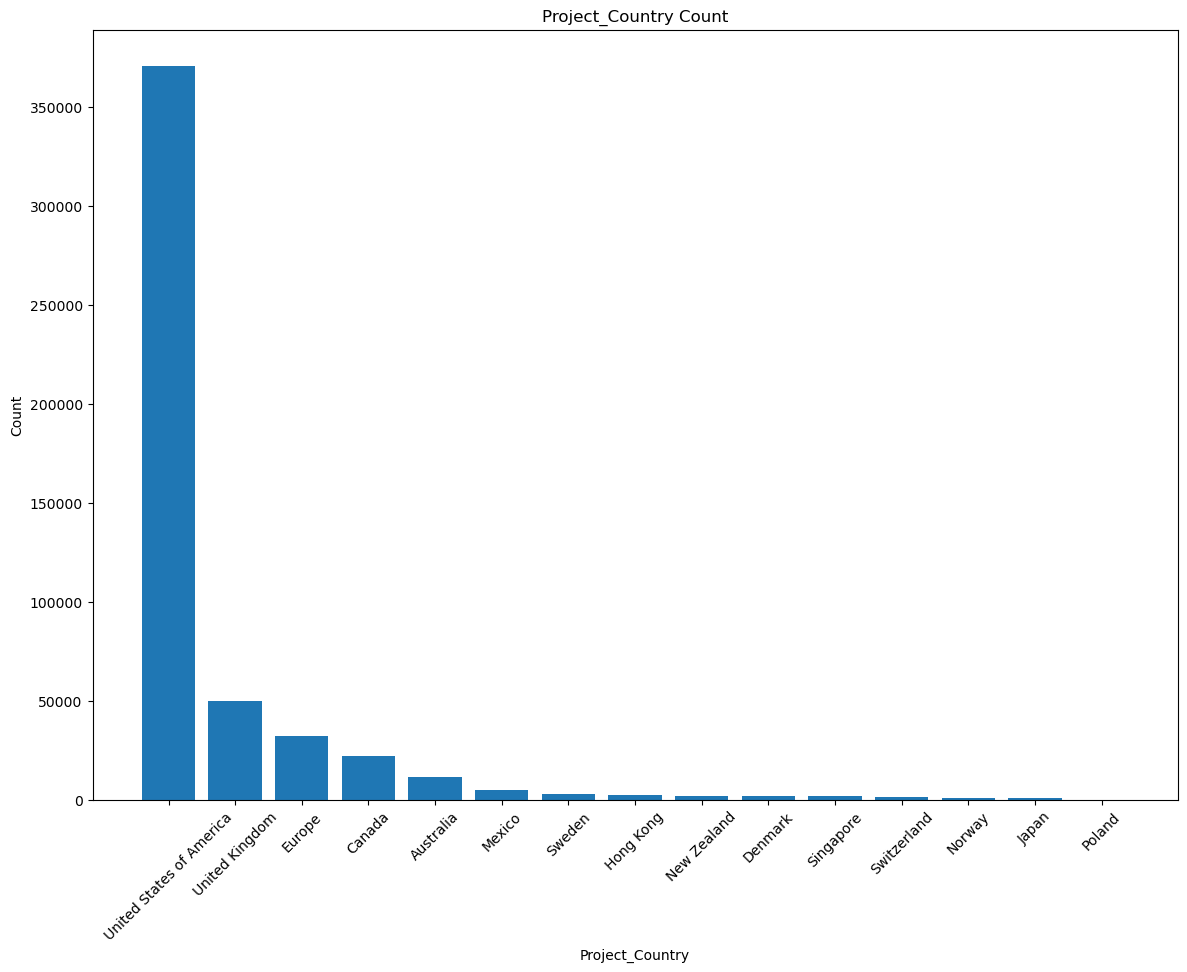

In [67]:
graph_counts(country_count, 'Project_Country', 'Count',  figsize=(14, 10))

The US UK, Europe, Canada, and Australia account for the majority of instances in the dataset, I will focus on those only. 

I will add Sweden, Denmark, Switzerland, Norway, and Poland to the Europe count. I will also change the currency for these countries to Eur

In [23]:
working_copy['Project_Currency'].value_counts()

USD    370515
GBP     50111
EUR     32463
CAD     22064
AUD     11457
MXN      5005
SEK      2974
HKD      2636
NZD      2105
DKK      1781
SGD      1769
CHF      1403
NOK      1058
JPY       840
PLN        18
Name: Project_Currency, dtype: int64

In [49]:
#set dictionaries to replace values
euro_dict = {'Sweden': 'Europe', 'Denmark': 'Europe', 'Switzerland': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe'}
euro_currency = {'SEK': 'EUR', 'DKK': 'EUR', 'CHF': 'EUR', 'NOK': 'EUR', 'PLN': 'EUR'}

In [97]:
working_copy['Project_Country'].replace(euro_dict, inplace=True)
working_copy['Project_Currency'].replace(euro_currency, inplace=True)

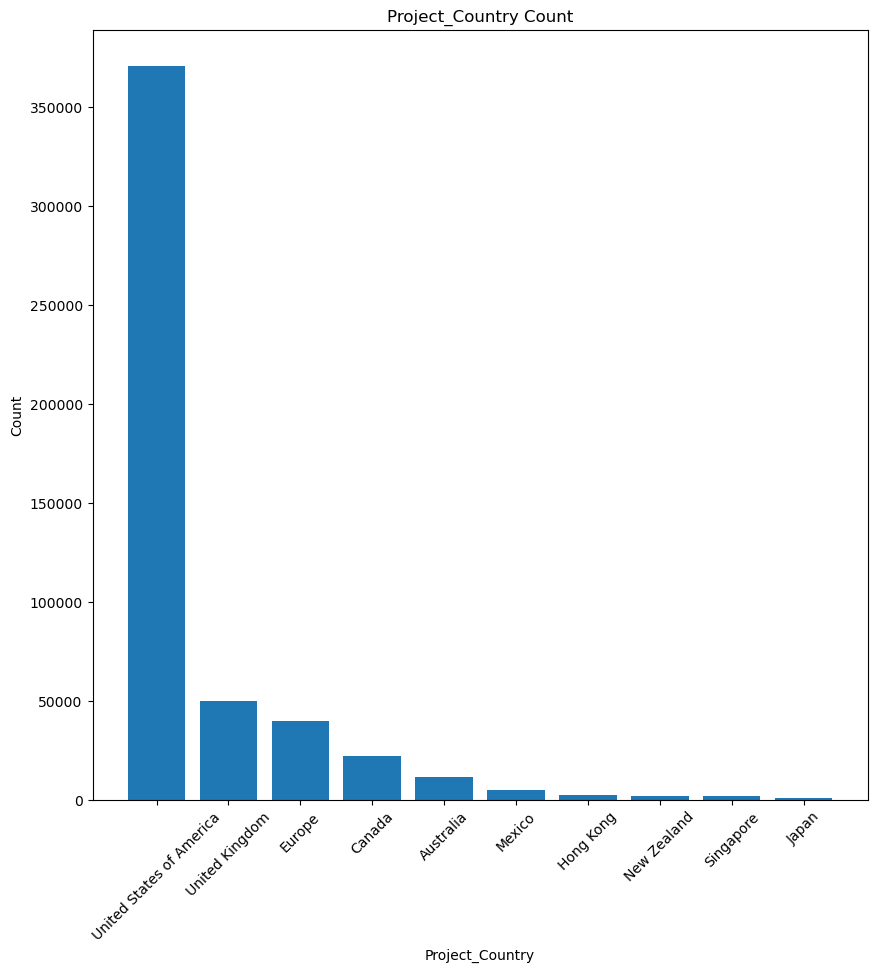

In [27]:
#regraph country counts
country_count = get_counts(working_copy, 'Project_Country')
graph_counts(country_count, 'Project_Country', 'Count', (10, 10))

In [100]:
(working_copy['Project_Country'].value_counts() / len(working_copy) * 100).round()

United States of America    73.0
United Kingdom              10.0
Europe                       8.0
Canada                       4.0
Australia                    2.0
Mexico                       1.0
Hong Kong                    1.0
New Zealand                  0.0
Singapore                    0.0
Japan                        0.0
Name: Project_Country, dtype: float64

The US, United Kingdom, Europe, Canada, and Australia account for 97% of my data while the US accounts for 73% of my data. I think for it is best if I drop Mexico, Hong Kong, New Zealand, Singapore, Japan

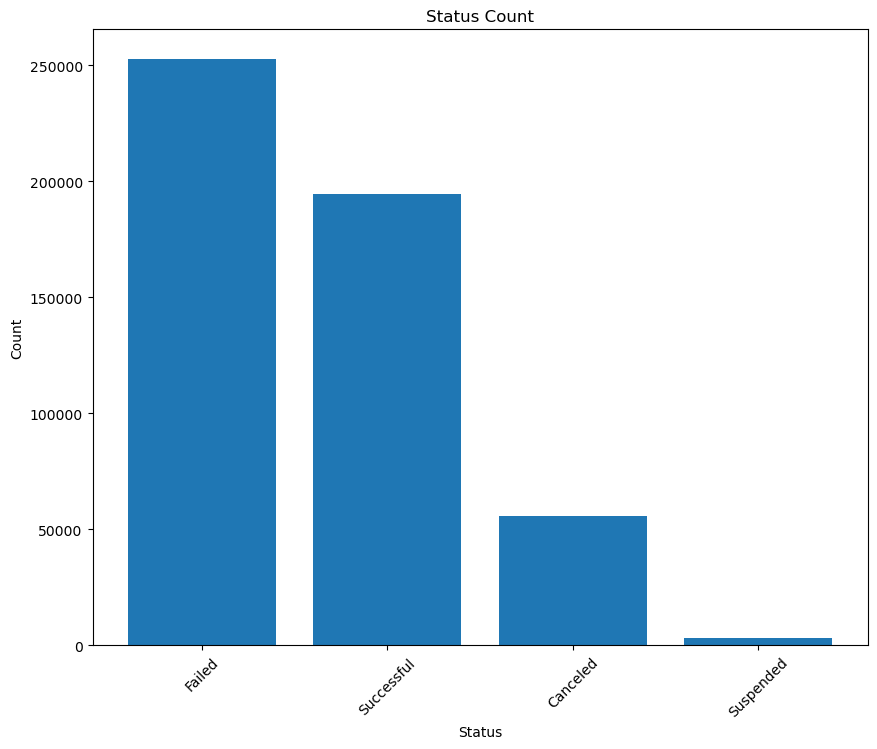

In [68]:
graph_counts(status_count, 'Status', 'Count', (10, 8))

There are more Failed campaigns than Successful ones. I do consider Canceled and Suspended as Failed and I will reflect that in the dataframe

In [111]:
working_copy['Status'].replace(['Canceled', 'Suspended'], 'Failed', inplace=True)

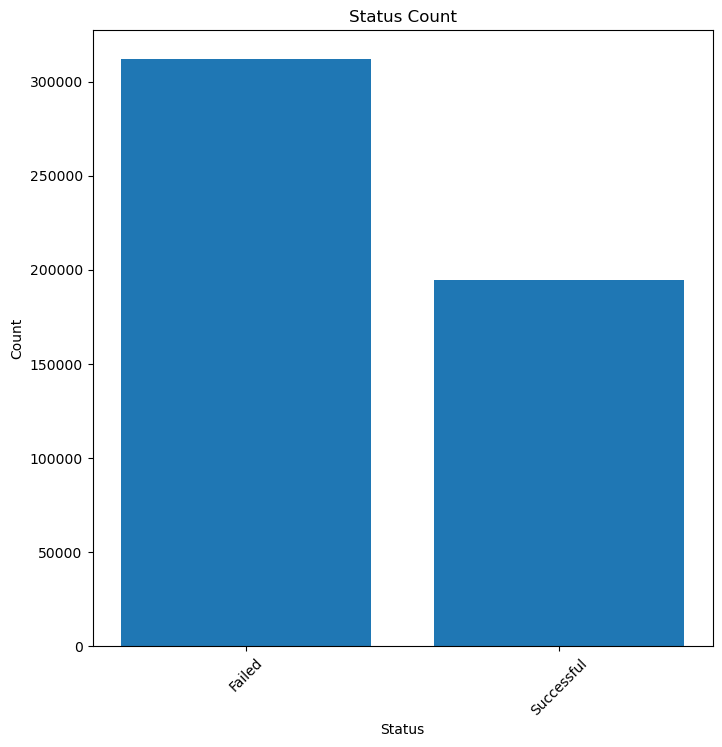

In [33]:
#remake counts and graphs for status

status_count = get_counts(working_copy, 'Status')
graph_counts(status_count, 'Status', 'Count',(8,8))

Important to note the unbalanced dataset for later modelling

Let's explore success rates by category and country

In [81]:
#success rates by category and country

#function to get success rate
def success_rate(dataframe):
    return (dataframe.eq('Successful').sum() / dataframe.size *100).round(0)

#plot success rate
def plot_success_rate(data, title, xlabel, ylabel, rot=int, figsize=tuple):
    data.plot.bar(rot=rot, figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

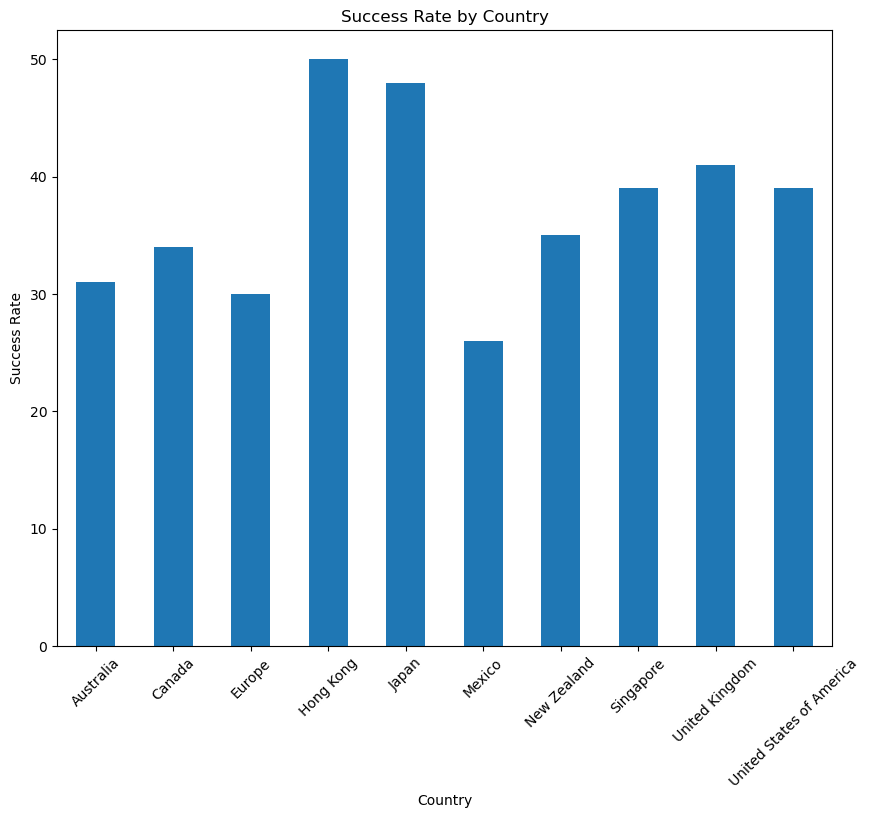

In [83]:
#success rate by country
country_success = working_copy.groupby('Project_Country')['Status'].agg(success_rate)
#plot success rate
plot_success_rate(country_success, 'Success Rate by Country', 'Country', 'Success Rate', 45, (10, 8))


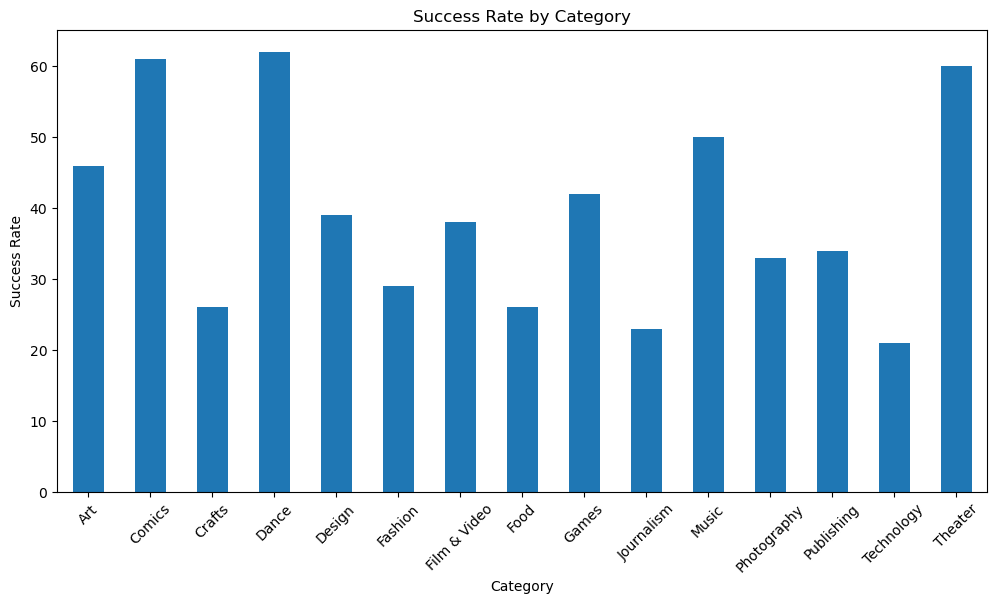

In [84]:
# success rate by category
category_success = working_copy.groupby('Category')['Status'].agg(success_rate)
plot_success_rate(category_success, 'Success Rate by Category', 'Category', 'Success Rate', rot=45, figsize=(12, 6))

In [92]:
#don't run code... need to work out graphing code. 

#success by country and category
country_category = working_copy.groupby(["Project_Country", "Category"])["Status"].agg(success_rate)

country_category_df = pd.DataFrame(country_category)
country_category_df.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the sales of product A in each country as a bar chart
sns.barplot(x="country", y="sales", data=df[df["product"] == "A"], ax=axes[0])
axes[0].set_title("Sales of Product A")

# Plot the sales of product B in each country as a bar chart
sns.barplot(x="country", y="sales", data=df[df["product"] == "B"], ax=axes[1])
axes[1].set_title("Sales of Product B")

# Plot the sales of product C in each country as a bar chart
sns.barplot(x="country", y="sales", data=df[df["product"] == "C"], ax=axes[2])
axes[2].set_title("Sales of Product C")

# Show the plot
plt.show()

In [55]:
# check nulls and 0's
check_nulls(working_copy)

'There are no nulls in your data.'

In [66]:
working_copy.isna().sum()

Category            0
Subcategory         0
Project_Country     0
Launched            0
Deadline            0
Project_Currency    0
Goal                0
Pledged             0
Backers (#)         0
Status              0
Duration (days)     0
dtype: int64

In [68]:
working_copy.sample(10)

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)
75315,Music,Country & Folk,United States of America,2013-07-02,2013-08-01,USD,30000,30070,309,Successful,30
294971,Music,Classical Music,United States of America,2010-07-19,2010-09-01,USD,4500,873,18,Failed,44
126617,Film & Video,Webseries,United States of America,2012-04-19,2012-05-18,USD,16000,225,5,Failed,29
454285,Publishing,Poetry,United States of America,2017-05-28,2017-06-27,USD,600,0,0,Failed,30
434093,Publishing,Academic,Europe,2018-01-19,2018-02-18,EUR,1000,106,3,Failed,30
290080,Games,Video Games,Mexico,2019-10-16,2019-11-30,MXN,4990,917,3,Failed,45
373352,Fashion,Fashion,United Kingdom,2014-10-30,2014-11-29,GBP,2000,2117,59,Successful,30
191650,Art,Art,United States of America,2013-06-10,2013-07-05,USD,10000,10100,41,Successful,25
31691,Film & Video,Webseries,United States of America,2014-02-18,2014-03-20,USD,75000,75006,145,Successful,30
173498,Technology,Technology,Europe,2015-05-27,2015-07-13,EUR,10000,10327,251,Successful,47


In [123]:
#check for successful campaigns that have 0 backers - 9890 instances will replace these with medians
success_no_backers = (working_copy['Backers (#)'] == 0) & (working_copy['Status'] == 'Successful')

#get median values for successful campaigns
median_backers_success = working_copy.loc[(working_copy['Status'] == 'Successful') & (working_copy['Backers (#)'] != 0), 'Backers (#)'].median()

# Replace the values that are 0 with the median value
working_copy.loc[success_no_backers, 'Backers (#)'] = median_backers_success


In [124]:
#check to see if above worked - 
working_copy[(working_copy['Backers (#)'] == 0) & (working_copy['Status'] == 'Successful')]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)


In [116]:
#check for Successful status where Pledged < Goal - These should be Failures 6 instances
should_be_fails = working_copy[(working_copy['Status'] == 'Successful') & (working_copy['Pledged'] < working_copy['Goal'])]

# Replace the values that match the condition with 'Failed'
working_copy.loc[working_copy['Pledged'] < working_copy['Goal'], 'Status'] = 'Failed'

In [126]:
working_copy.sample(10)

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)
95274,Film & Video,Documentary,United States of America,2016-08-04,2016-09-11,USD,25000,28690,221,Successful,38
234833,Music,Indie Rock,United States of America,2012-01-27,2012-02-26,USD,6250,6736,105,Successful,30
392299,Music,Country & Folk,United States of America,2012-04-30,2012-06-29,USD,1500,1669,25,Successful,60
310598,Art,Mixed Media,United States of America,2012-06-07,2012-07-07,USD,3600,0,0,Failed,30
348177,Publishing,Fiction,United States of America,2019-01-19,2019-02-18,USD,2500,13,3,Failed,30
372727,Crafts,Crafts,United States of America,2012-04-12,2012-05-12,USD,2000,210,3,Failed,30
42095,Art,Painting,United States of America,2010-02-05,2010-05-06,USD,50000,625,19,Failed,90
367259,Games,Playing Cards,United States of America,2016-10-07,2016-10-17,USD,2000,2155,88,Successful,10
79411,Publishing,Children's Books,United States of America,2014-05-06,2014-07-05,USD,30000,15,1,Failed,60
465572,Food,Food,United States of America,2014-04-09,2014-04-19,USD,500,260,9,Failed,10


In [127]:
#check above
working_copy[(working_copy['Status'] == 'Successful') & (working_copy['Pledged'] < working_copy['Goal'])]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)


In [128]:
#check for Failed Campaigns where pledged > Goal - These should be successful - 2065 instances
should_be_success = (working_copy['Status'] == 'Failed') & (working_copy['Pledged'] > working_copy['Goal'])

#replace above values 
working_copy.loc[should_be_success, 'Status'] = 'Successful'

In [129]:
#check above
working_copy[(working_copy['Status'] == 'Failed') & (working_copy['Pledged'] > working_copy['Goal'])]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)


In [131]:
working_copy.sample(10)

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)
402597,Music,Music,Europe,2015-04-22,2015-05-22,EUR,1500,415,13,Failed,30
455545,Art,Art,United States of America,2020-09-22,2020-10-23,USD,550,284,13,Failed,31
170116,Fashion,Childrenswear,United States of America,2015-01-25,2015-02-24,USD,10000,59,5,Failed,30
137211,Film & Video,Film & Video,United States of America,2015-08-10,2015-09-09,USD,15000,0,0,Failed,30
181382,Film & Video,Documentary,United States of America,2010-10-05,2010-11-19,USD,10000,0,0,Failed,45
468210,Publishing,Nonfiction,Europe,2018-03-12,2018-04-26,EUR,500,51,9,Failed,45
373255,Food,Food,United States of America,2014-06-20,2014-07-20,USD,2000,351,13,Failed,30
32698,Technology,Gadgets,United States of America,2017-06-01,2017-07-16,USD,70000,82450,375,Successful,45
160142,Fashion,Apparel,United States of America,2017-08-17,2017-09-09,USD,11400,540,3,Failed,23
323485,Film & Video,Shorts,United Kingdom,2015-05-20,2015-06-16,GBP,3000,3087,70,Successful,27


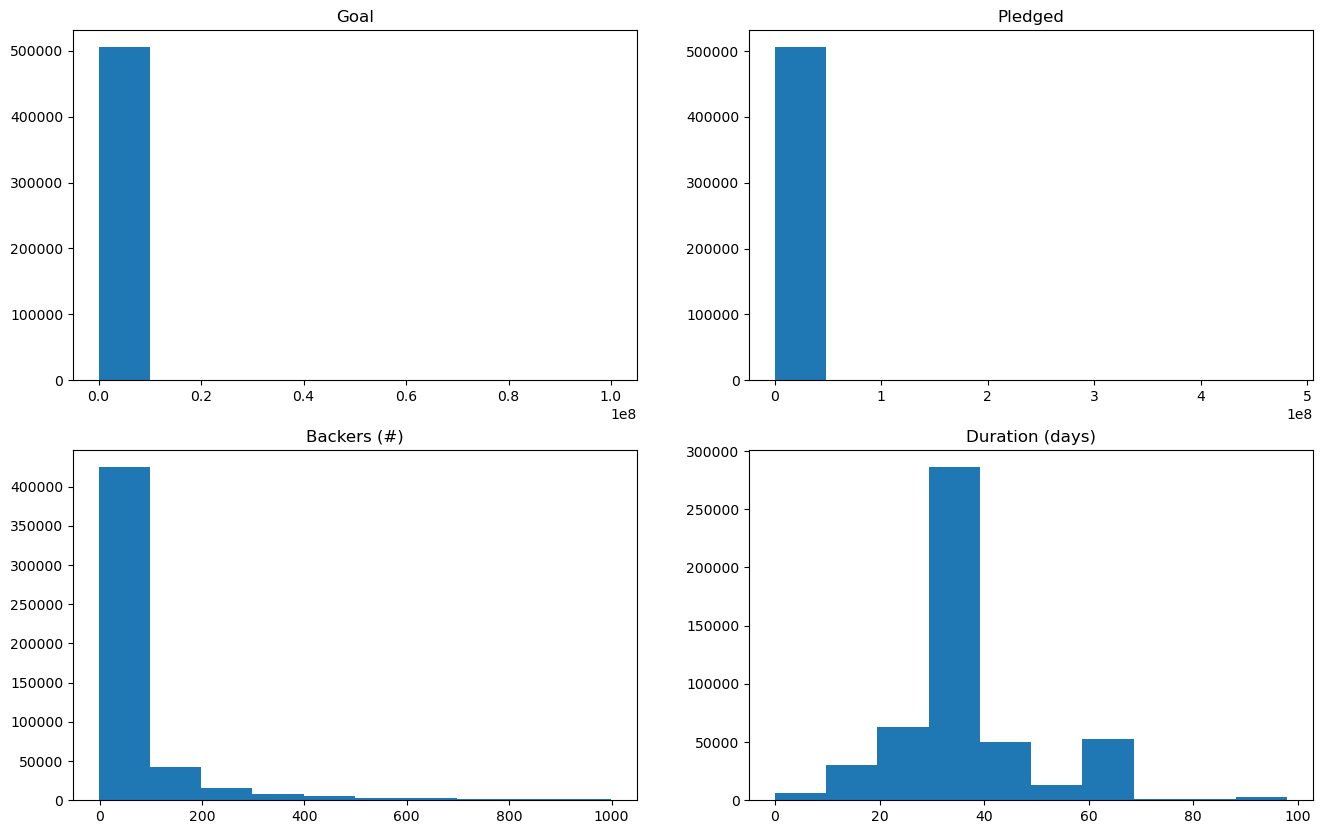

In [75]:
#list for numeric columns
numeric_data = ['Goal', 'Pledged', 'Backers (#)', 'Duration (days)']

#make histograms and boxplots
make_hist(working_copy, numeric_data, 2, 2, (16, 10))

Holy moly...will have to do something with Goal and Pledged... and Backers and Duration

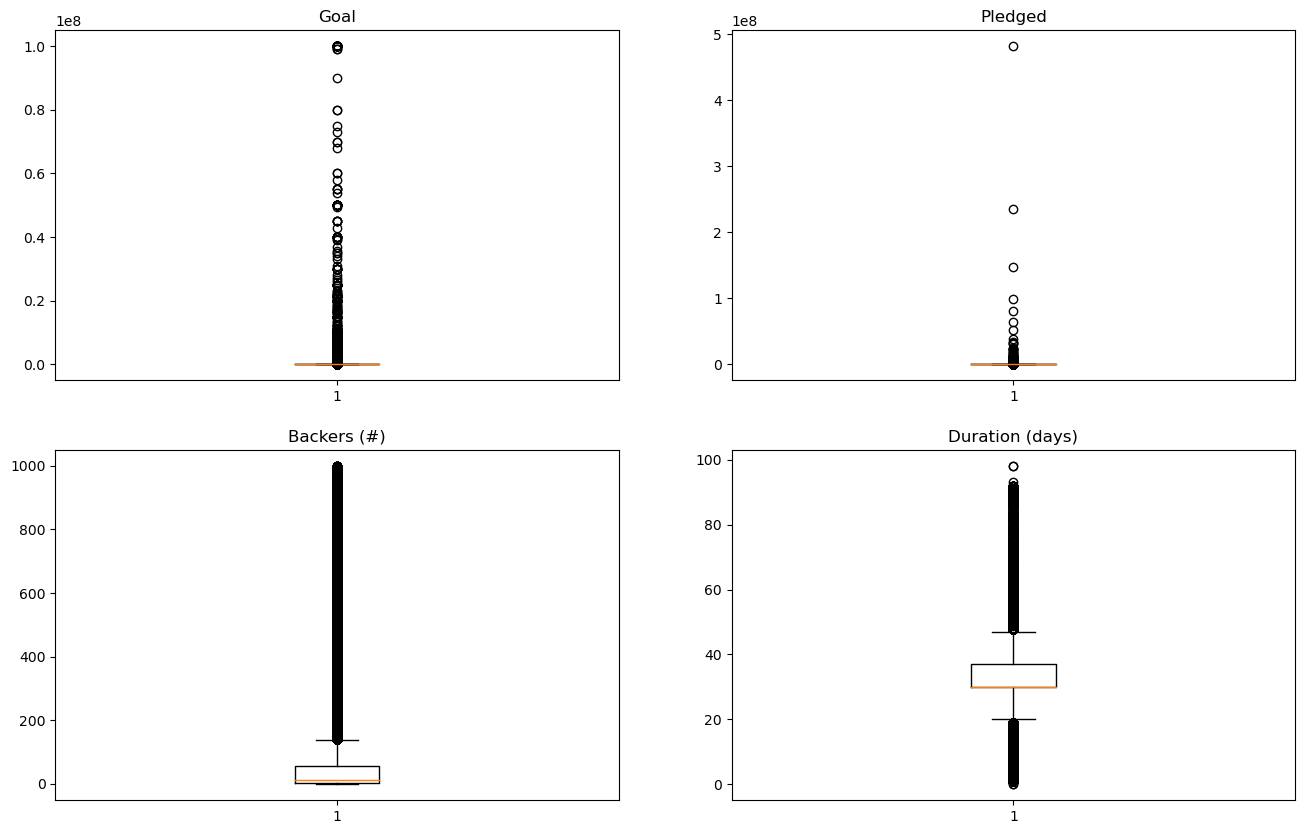

In [76]:
#make some boxplots
make_boxplot(working_copy, numeric_data, 2, 2, (16, 10))

In [22]:
working_copy['Project_Country'].value_counts()

United States of America    370515
United Kingdom               50111
Europe                       32463
Canada                       22064
Australia                    11457
Mexico                        5005
Sweden                        2974
Hong Kong                     2636
New Zealand                   2105
Denmark                       1781
Singapore                     1769
Switzerland                   1403
Norway                        1058
Japan                          840
Poland                          18
Name: Project_Country, dtype: int64